### Steel Defect Detection
Steel is one of the most important building materials of modern times. Steel buildings are resistant to natural and man-made wear which has made the material ubiquitous around the world. To help make production of steel more efficient, this project will help to identify defects

Problem statement :
The objective of this project is to predict the location and type of defects found in steel manufacturing using the images provided. The images are named with a unique ImageId, and our task is to segment each image and classify the defects in the test set
* classify the type of steel defect, 
* segment the parts of the image that contain the defect.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

import random
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import os
from PIL import Image 
import tensorflow as tf
#import tensorflow
from tensorflow import keras
import tensorflow.keras.backend as K
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import UpSampling2D, Conv2D, Activation, LeakyReLU, BatchNormalization,Input,Conv2DTranspose
from tensorflow. keras import Model
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, LearningRateScheduler,Callback
from tqdm import tqdm_notebook
#from .layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate

Using TensorFlow backend.


In [2]:
df = pd.read_csv('C:/Users/sonali/Desktop/DS/Semester_4/DLproject/severstal-steel-defect-detection/train.csv')
df.shape

(7095, 3)

In [3]:
df.head()

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...


In [4]:
from glob import glob
# set paths to train and test image datasets
TRAIN_PATH = 'C:/Users/sonali/Desktop/DS/Semester_4/DLproject/severstal-steel-defect-detection/train_images/'
TEST_PATH = 'C:/Users/sonali/Desktop/DS/Semester_4/DLproject/severstal-steel-defect-detection/test_images/'

# load dataframe with train labels
train_fns = sorted(glob(TRAIN_PATH + '*.jpg'))
test_fns = sorted(glob(TEST_PATH + '*.jpg'))

print('There are {} images in the train set.'.format(len(train_fns)))
print('There are {} images in the test set.'.format(len(test_fns)))

There are 12568 images in the train set.
There are 5506 images in the test set.


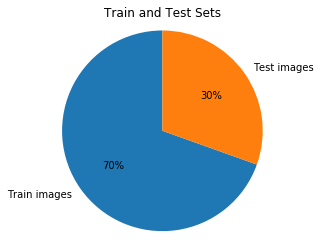

In [21]:
# plotting a pie chart which demonstrates train and test sets
labels = 'Train images', 'Test images'
sizes = [len(train_fns), len(test_fns)]

fig, ax = plt.subplots(figsize=(4, 4))
ax.pie(sizes,labels=labels,autopct='%.0f%%',startangle=90)
ax.axis('equal')
ax.set_title('Train and Test Sets')

plt.show()

In [23]:
#How many steel images have disadvantages?
print("Train_df INFO : \n")
print("1.Number of data points : ", len(df))
print("2.Correct images  : ", df["EncodedPixels"].isna().sum().T)
print("3.Incorrect images : ",len(df) - df["EncodedPixels"].isna().sum().T )

Train_df INFO : 

1.Number of data points :  7095
2.Correct images  :  0
3.Incorrect images :  7095


In [26]:
#How many classes are assigned to a single photo? It's single or multilabel segmentation problem ?
# add new features from existing one
#df["Label"] = df["ImageId_ClassId"].apply(lambda x : x.split("_")[1])
#df["Image_id"] = df["ImageId_ClassId"].apply(lambda x : x.split("_")[0])
#df.head(2)

In [25]:
#data without nans
train_df_damaged = df[df["EncodedPixels"].notnull()]
train_df_damaged.head()

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...


In [28]:
n_class_per_image =  train_df_damaged["Label"].groupby(train_df_damaged["Image_id"]).count()
plt.figure(figsize=(15,5))
plt.suptitle("Number of labels per 1 image")
plt.grid()
import seaborn as sns
sns.countplot(y=n_class_per_image)
print("Numeric info : \n")
print("1 class : ",len(n_class_per_image[n_class_per_image == 1]))
print("2 classes : ",len(n_class_per_image[n_class_per_image == 2]))
print("3 classes : ",len(n_class_per_image[n_class_per_image == 3]))
print("4 classes : ",len(n_class_per_image[n_class_per_image == 4]))

KeyError: 'Label'